In [1]:
using Graphs, Random, Plots

In [2]:
function removeNodes(g::Graph, f::Float64, strategy::Vector)    
    start = 1
    stop = ceil(Int, n*f)
    rem_vertices!(g, strategy[start:stop])
    return g
end

removeNodes (generic function with 1 method)

In [ ]:
using Plots
plot(f, y_rand[1, :], label = "k = 2, random", xlabel = "fraction of nodes removed", ylabel = "giant component size", legend = :topright, markershape = :circle)
plot!(f, y_deg[1, :], label = "k = 2, degree", xlabel = "fraction of nodes removed", ylabel = "giant component size", markershape = :circle)

Fig 1. Size of the giant component after removal of nodes, presented as $\frac{P(f)}{P(0)}$, where $f$ is a fraction of nodes removed. Results for the Barabasi-Albert network with $N = 10^5, L = 10^2$.


In [ ]:
plot(f, y_rand[2, :], label = "k = 4, random", xlabel = "fraction of nodes removed", ylabel = "giant component size", legend = :topright, markershape = :circle)
plot!(f, y_deg[2, :], label = "k = 4, degree", xlabel = "fraction of nodes removed", ylabel = "giant component size", markershape = :circle)

In [3]:
n = 10^4
L = 10^2

k = [1, 2]
f = 0.00:10^(-4):0.01
y_rand = zeros(length(k), length(f))
y_deg = zeros(length(k), length(f))
y_between = zeros(length(k), length(f))
y_closeness = zeros(length(k), length(f))

for i in 1:length(k)
    for realisation in 1:L
        
        g = barabasi_albert(n, k[i])
        rand_strategy = [rand() for i in 1:n]
        degree_strategy = degree(g)
        mean_degree = sum(degree_strategy)./n
        
        
        #between_strategy = betweenness_centrality(g)
        #closeness_strategy = closeness_centrality(g)
        nodes = 1:n
        rand_strategy = sort(nodes, by = x -> rand_strategy[x], rev = true)
        degree_strategy = sort(nodes, by = x -> degree_strategy[x], rev = true)
        #between_strategy = sort(nodes, by = x -> between_strategy[x], rev = true)
        #closeness_strategy = sort(nodes, by = x -> closeness_strategy[x], rev = true)
        giant_pre = maximum([length(cc) for cc in connected_components(g)])

        println("k = $(k[i]), realisation = $realisation, <k> = $mean_degree")

        for j in 1:length(f)
            
            g0 = copy(g)
            g0 = removeNodes(g0, f[j], rand_strategy)
            giant_post = maximum([length(cc) for cc in connected_components(g0)])
            y_rand[i, j] += (giant_post/giant_pre)/L

            g1 = copy(g)
            g1 = removeNodes(g1, f[j], degree_strategy)
            giant_post = maximum([length(cc) for cc in connected_components(g1)])
            y_deg[i, j] += (giant_post/giant_pre)/L
            
            #=
            g2 = copy(g)
            g2 = removeNodes(g2, f[j], between_strategy)
            giant_post = maximum([length(cc) for cc in connected_components(g2)])
            y_between[i, j] += (giant_post/giant_pre)/L

            g3 = copy(g)
            g3 = removeNodes(g3, f[j], closeness_strategy)
            giant_post = maximum([length(cc) for cc in connected_components(g3)])
            y_closeness[i, j] += (giant_post/giant_pre)/L
            =#
            
        end

    end
end

k = 1, realisation = 1, <k> = 1.99998


LoadError: InterruptException:

In [22]:
using JLD2
save("saved_networks/network_robustness_ws_C.jld2", "n", n, "L", L, "k", k, "f", f, "y_rand", y_rand, "y_deg", y_deg, "y_between", y_between, "y_closeness", y_closeness)

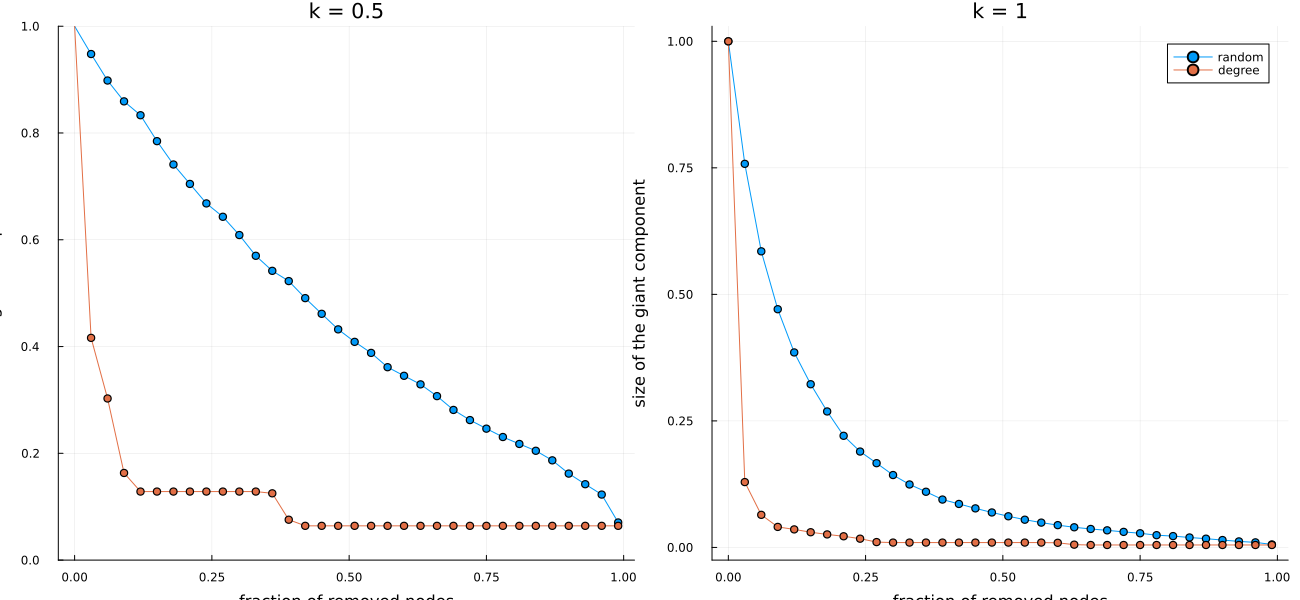

In [19]:
pl1 = plot(f, y_rand[1, :], title = "k = 0.5", label = "", ylabel = "size of the giant component", xlabel = "fraction of removed nodes", legend = :topright, 
markershape = :circle)
plot!(pl1, f, y_deg[1, :], label = "", markershape = :circle)

pl2 = plot(f, y_rand[2, :], title = "k = 1", label = "random", ylabel = "size of the giant component", xlabel = "fraction of removed nodes", legend = :topright, 
markershape = :circle)
plot!(pl2, f, y_deg[2, :], label = "degree", markershape = :circle)
plot!(pl1, ylim = (0.0, 1.0))

plot(pl1, pl2, layout = (1, 2), size = (1300, 600))

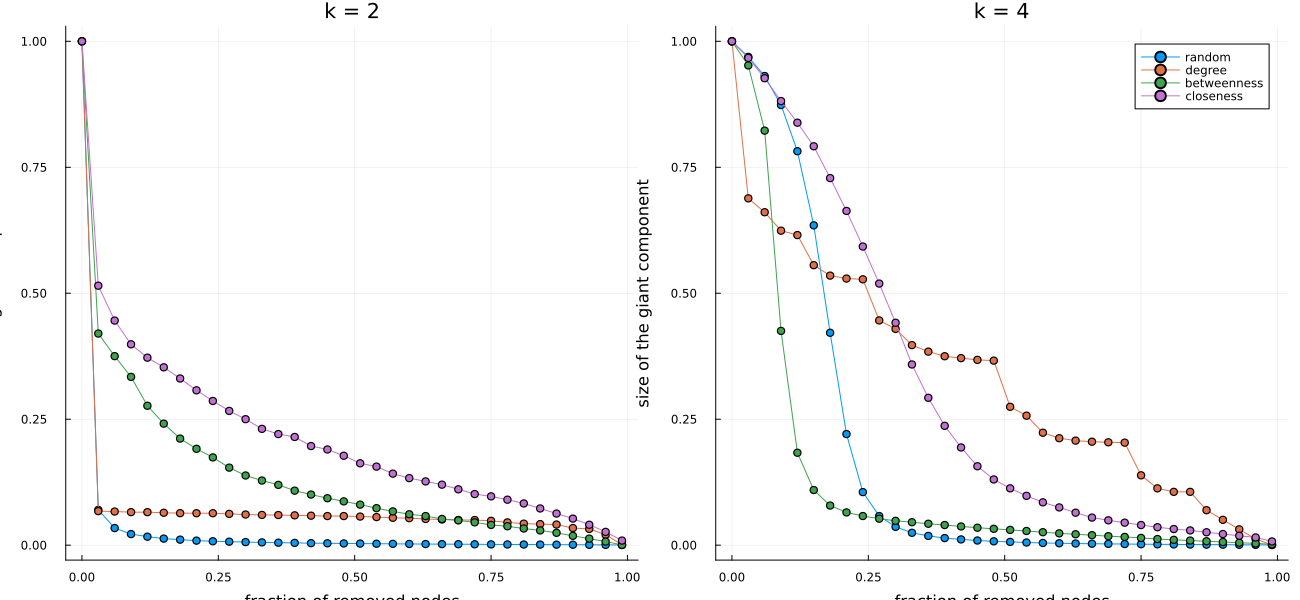

In [9]:
pl1 = plot(f, y_rand[1, :], title = "k = 2", label = "", ylabel = "size of the giant component", xlabel = "fraction of removed nodes", legend = :topright, 
markershape = :circle)
plot!(pl1, f, y_deg[1, :], label = "", markershape = :circle)
plot!(pl1, f, y_between[1, :], label = "", markershape = :circle)
plot!(pl1, f, y_closeness[1, :], label = "", markershape = :circle)

pl2 = plot(f, y_rand[2, :], title = "k = 4", label = "random", ylabel = "size of the giant component", xlabel = "fraction of removed nodes", legend = :topright, 
markershape = :circle)
plot!(pl2, f, y_deg[2, :], label = "degree", markershape = :circle)
plot!(pl2, f, y_between[2, :], label = "betweenness", markershape = :circle)
plot!(pl2, f, y_closeness[2, :], label = "closeness", markershape = :circle)


plot(pl1, pl2, layout = (1, 2), size = (1300, 600))